# Versuch 253 Absorption - Auswertung
#### Felix Fleischle - 1.3.2022

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#%matplotlib qt5

## 1. Absorption von Betastrahlung

In [3]:
# Messwerte:
t_beta = np.array([30, 30, 30, 30, 30, 30, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]) #s
N_beta = np.array([402, 250, 189, 124, 86, 45, 139, 107, 77, 67, 56, 42, 48, 53, 47, 55]) # Gezählte Zerfälle
N_beta_err = np.sqrt(N_beta)
x_beta = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9, 4.2, 4.5])

n_beta = N_beta / t_beta
n_beta_err = N_beta_err / t_beta

print("Zählraten Beta:", n_beta, "+-", n_beta_err)

Zählraten Beta: [13.4         8.33333333  6.3         4.13333333  2.86666667  1.5
  1.15833333  0.89166667  0.64166667  0.55833333  0.46666667  0.35
  0.4         0.44166667  0.39166667  0.45833333] +- [0.66833126 0.52704628 0.45825757 0.37118429 0.30912062 0.2236068
 0.09824855 0.08620067 0.0731247  0.06821127 0.06236096 0.05400617
 0.05773503 0.06066758 0.05713046 0.06180165]


In [4]:
N_0beta = 113
N_0beta_err = np.sqrt(N_0beta)
t_0beta = 300
n_0beta = N_0beta / t_0beta
n_0beta_err = N_0beta_err / t_0beta

print("Zählrate n_0^b:", n_0beta, "+-", n_0beta_err)

Zählrate n_0^b: 0.37666666666666665 +- 0.03543381937578217


In [5]:
n_beta_diff = n_beta - n_0beta
n_beta_diff_err = np.sqrt(n_beta_err**2 + n_0beta_err**2)

print("n minus Untergrund:", n_beta_diff, "+-", n_beta_diff_err)

n minus Untergrund: [13.02333333  7.95666667  5.92333333  3.75666667  2.49        1.12333333
  0.78166667  0.515       0.265       0.18166667  0.09       -0.02666667
  0.02333333  0.065       0.015       0.08166667] +- [0.66926992 0.52823606 0.45962545 0.37287174 0.31114484 0.2263969
 0.10444297 0.09319931 0.08125748 0.07686568 0.07172478 0.06459274
 0.06774134 0.07025746 0.06722681 0.07123903]


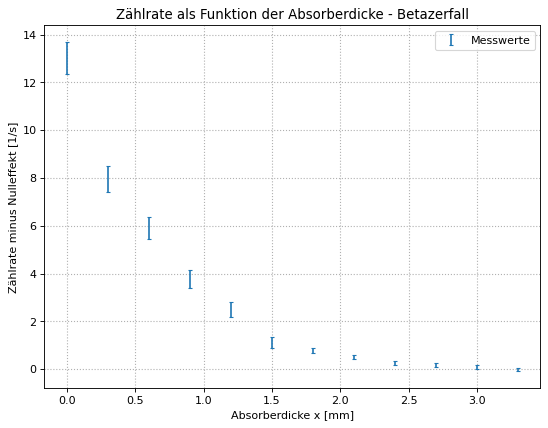

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x_beta[:-4],n_beta_diff[:-4], yerr = n_beta_diff_err[:-4], linestyle='None', label="Messwerte", capsize = 2)
plt.xlabel('Absorberdicke x [mm]')
plt.ylabel('Zählrate minus Nulleffekt [1/s]')
plt.title('Zählrate als Funktion der Absorberdicke - Betazerfall')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

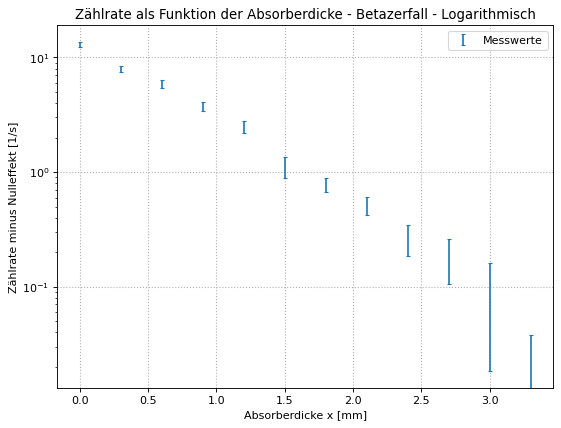

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x_beta[:-4],n_beta_diff[:-4], yerr = n_beta_diff_err[:-4], linestyle='None', label="Messwerte", capsize = 2)
plt.xlabel('Absorberdicke x [mm]')
plt.ylabel('Zählrate minus Nulleffekt [1/s]')
plt.title('Zählrate als Funktion der Absorberdicke - Betazerfall - Logarithmisch')
plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [8]:
def expfunc(x, a, mu, b):
    return a * np.exp(- mu * x) + b
popt_beta, pcov_beta = curve_fit(expfunc, x_beta[:-4], n_beta_diff[:-4], sigma = n_beta_diff_err[:-4])
xlinspace = np.linspace(0, 5, 100)

n_beta_diff_ext = n_beta_diff - n_beta_diff_err
popt_beta_ext, pcov_beta_ext = curve_fit(expfunc, x_beta[:-4], n_beta_diff_ext[:-4], sigma = n_beta_diff_err[:-4])

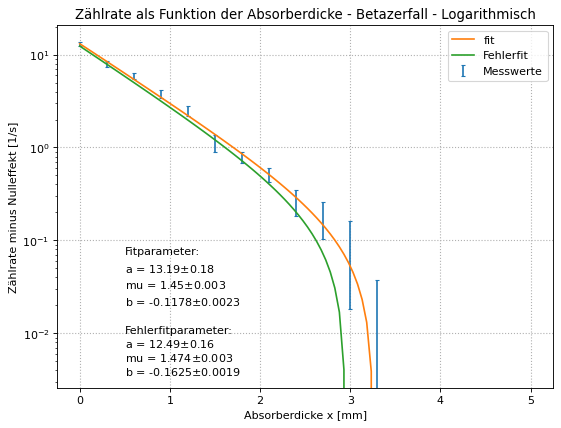

In [51]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x_beta[:-4],n_beta_diff[:-4], yerr = n_beta_diff_err[:-4], linestyle='None', label="Messwerte", capsize = 2)
plt.plot(xlinspace,expfunc(xlinspace,*popt_beta), label="fit")
plt.plot(xlinspace,expfunc(xlinspace,*popt_beta_ext), label="Fehlerfit")
plt.xlabel('Absorberdicke x [mm]')
plt.ylabel('Zählrate minus Nulleffekt [1/s]')
plt.title('Zählrate als Funktion der Absorberdicke - Betazerfall - Logarithmisch')
plt.yscale('log')
plt.legend()
#plt.axis([-0.1, 4, 11, 0.01])
plt.text(0.5, 0.07, 'Fitparameter:')
plt.text(0.5, 0.045, 'a = ' + str(np.round(popt_beta[0],2)) + '$\pm$' + str(np.round(pcov_beta[0,0],2)))
plt.text(0.5, 0.03, 'mu = ' + str(np.round(popt_beta[1],3)) + '$\pm$' + str(np.round(pcov_beta[1,1],3)))
plt.text(0.5, 0.02, 'b = ' + str(np.round(popt_beta[2],4)) + '$\pm$' + str(np.round(pcov_beta[2,2],4)))
plt.text(0.5, 0.01, 'Fehlerfitparameter:')
plt.text(0.5, 0.007, 'a = ' + str(np.round(popt_beta_ext[0],2)) + '$\pm$' + str(np.round(pcov_beta_ext[0,0],2)))
plt.text(0.5, 0.005, 'mu = ' + str(np.round(popt_beta_ext[1],3)) + '$\pm$' + str(np.round(pcov_beta_ext[1,1],3)))
plt.text(0.5, 0.0035, 'b = ' + str(np.round(popt_beta_ext[2],4)) + '$\pm$' + str(np.round(pcov_beta_ext[2,2],4)))

plt.grid(linestyle=":", linewidth=1)

In [22]:
x_max_beta_err = 3.23 - 2.93
x_max_beta = 3.23 #mm

x_max_beta_cm = x_max_beta * 0.1
x_max_beta_cm_err = x_max_beta_err * 0.1

rho_beta = 2.6989 #g/cm^3

R_beta = rho_beta * x_max_beta_cm
R_beta_err = rho_beta * x_max_beta_cm_err

print("R Beta:", R_beta, "+-", R_beta_err)

R_es_beta = 0.130 #g/cm^2

R_ges_beta = R_beta + R_es_beta
R_ges_beta_err = R_beta_err

print("Gesamt R Beta:", R_ges_beta, "+-", R_ges_beta_err)


R Beta: 0.8717447 +- 0.08096699999999996
Gesamt R Beta: 1.0017447000000002 +- 0.08096699999999996


In [23]:
E_max_beta = 2.15 #MeV
E_max_beta_err = 0.1

E_max_beta_lit = 2.274

sigma_E_max_beta = (E_max_beta_lit - E_max_beta)/E_max_beta_err
print("Sigma:", sigma_E_max_beta)

Sigma: 1.240000000000001


## 2. Absorption von Gammastrahlung

In [24]:
n0_gamma = 90 / 300
n0_gamma_err = np.sqrt(90) / 300
print("n0 gamma:", n0_gamma, "+-", n0_gamma_err)

n0 gamma: 0.3 +- 0.03162277660168379


In [25]:
x_gamma = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
N_gamma = np.array([1227, 800, 620, 505, 341, 286, 228, 165, 132, 87, 84])
N_gamma_err = np.sqrt(N_gamma)
t_gamma = 60
n_gamma = N_gamma / t_gamma
n_gamma_err = N_gamma_err / t_gamma

print("Zählrate Gamma:", n_gamma, "+-", n_gamma_err)

Zählrate Gamma: [20.45       13.33333333 10.33333333  8.41666667  5.68333333  4.76666667
  3.8         2.75        2.2         1.45        1.4       ] +- [0.58380933 0.47140452 0.41499665 0.37453675 0.30776976 0.28185891
 0.25166115 0.21408721 0.19148542 0.15545632 0.15275252]


In [26]:
n_gamma_diff = n_gamma - n0_gamma
n_gamma_diff_err = np.sqrt(n_gamma_err**2 + n0_gamma_err**2)
print("Zählraten minus Untergrund:", n_gamma_diff, "+-", n_gamma_diff_err)

Zählraten minus Untergrund: [20.15       13.03333333 10.03333333  8.11666667  5.38333333  4.46666667
  3.5         2.45        1.9         1.15        1.1       ] +- [0.58466515 0.47246399 0.41619974 0.37586936 0.30939008 0.2836273
 0.25364017 0.2164101  0.19407902 0.15864005 0.15599145]


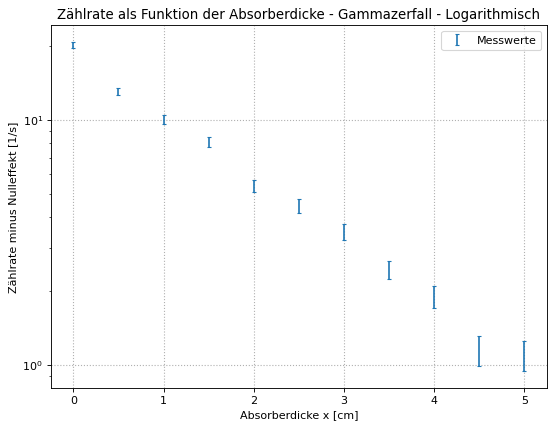

In [27]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x_gamma,n_gamma_diff, yerr = n_gamma_diff_err, linestyle='None', label="Messwerte", capsize = 2)
plt.xlabel('Absorberdicke x [cm]')
plt.ylabel('Zählrate minus Nulleffekt [1/s]')
plt.title('Zählrate als Funktion der Absorberdicke - Gammazerfall - Logarithmisch')
plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [28]:
popt_gamma, pcov_gamma = curve_fit(expfunc, x_gamma, n_gamma_diff, sigma=n_gamma_diff_err)

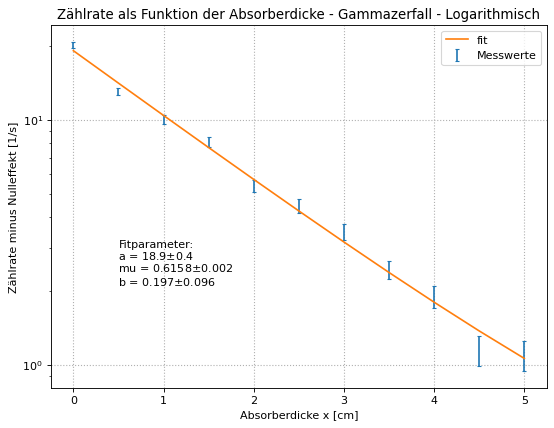

In [53]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x_gamma,n_gamma_diff, yerr = n_gamma_diff_err, linestyle='None', label="Messwerte", capsize = 2)
plt.plot(x_gamma,expfunc(x_gamma,*popt_gamma), label="fit")
plt.xlabel('Absorberdicke x [cm]')
plt.ylabel('Zählrate minus Nulleffekt [1/s]')
plt.title('Zählrate als Funktion der Absorberdicke - Gammazerfall - Logarithmisch')
plt.yscale('log')
plt.text(0.5, 3, 'Fitparameter:')
plt.text(0.5, 2.7, 'a = ' + str(np.round(popt_gamma[0],1)) + '$\pm$' + str(np.round(pcov_gamma[0,0],1)))
plt.text(0.5, 2.4, 'mu = ' + str(np.round(popt_gamma[1],4)) + '$\pm$' + str(np.round(pcov_gamma[1,1],4)))
plt.text(0.5, 2.1, 'b = ' + str(np.round(popt_gamma[2],3)) + '$\pm$' + str(np.round(pcov_gamma[2,2],3)))
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [30]:
mu_gamma = popt_gamma[1]
mu_gamma_err = np.sqrt(pcov_gamma[1,1])

print("mu:", mu_gamma, "+-", mu_gamma_err) # in 1/cm

rho_gamma = 11.342 #g/cm^3

mu_gamma_rho = mu_gamma / rho_gamma
mu_gamma_rho_err = mu_gamma_err / rho_gamma
print("Massenschwächungskoeff:", mu_gamma_rho, "+-", mu_gamma_rho_err) # cm^2/g

mu: 0.6158182527208421 +- 0.044831323387756895
Massenschwächungskoeff: 0.054295384651811156 +- 0.003952682365346225


In [31]:
E_gamma = 1.42
E_gamma_err = 1.42 - 1.37

E_gamma_lit = 1.333
sigma_E_gamma = np.abs((E_gamma_lit - E_gamma)/E_gamma_err)
print("Sigma:", sigma_E_gamma)

Sigma: 1.7400000000000055


## 3. Aktivität von Gamma

In [32]:
d_gamma = np.array([5, 10, 20]) #cm
d_gamma_err = np.array([0.3, 0.3, 0.3]) #cm

N_gamma_ak = np.array([9719, 3314, 926])
N_gamma_ak_err = np.sqrt(N_gamma_ak)
t_gamma_ak = 60

n_gamma_ak = N_gamma_ak / t_gamma_ak
n_gamma_ak_err = N_gamma_ak_err / t_gamma_ak
print("Zählraten Aktivität:", n_gamma_ak, "+-", n_gamma_ak_err)

r_gamma = 0.7 #cm

Zählraten Aktivität: [161.98333333  55.23333333  15.43333333] +- [1.64308315 0.95945586 0.5071708 ]


In [54]:
A = (4*n_gamma_ak*(d_gamma)**2)/(2 * 0.04 * (r_gamma)**2)
A_err = np.sqrt( ((4*n_gamma_ak_err*(d_gamma)**2)/(2 * 0.04 * (r_gamma)**2))**2 + ((4*n_gamma_ak*2*(d_gamma)*d_gamma_err)/(2 * 0.04 * (r_gamma)**2))**2)

print("Aktivität:", A, "+-", A_err)

Aktivität: [413222.78911565 563605.44217687 629931.97278912] +- [49763.57356277 35205.04517397 28029.59173561]


In [55]:
# Daten von SN 372:
A_2019 = 1160 * 10**3 #Bq
A_2010 = 3700 * 10**3 #Bg
T_12 = 5.2713 * 365 #Tage
lmbda_12 = np.log(2)/T_12
T_dist_2019 = 3 * 365 + 31 + 30 # 3 Jahre und 2 Monate zwischen 1.1.2019 und 1.3.2022
T_dist_2010 = 12 * 365 - 1 # 12 Jahre minus 1 Tag zwischen 2.3.2010 und 1.3.2022

A_akt_1 = A_2019 * np.exp(-lmbda_12 * T_dist_2019)
A_akt_2 = A_2010 * np.exp(-lmbda_12 * T_dist_2010)
print(A_akt_1, A_akt_2)
A_akt = np.mean([A_akt_1, A_akt_2])
A_akt_err = np.std([A_akt_1, A_akt_2])/np.sqrt(2)
print("Aktuelle Aktivität:", A_akt, "+-", A_akt_err)

# Test mit anderer Probe
#A_2019_2 = 2210 * 10**3
#A_2015_2 = 3700 * 10**3
#T_dist_2015 = 7*365 + 29

#A_akt_1_2 = A_2019_2 * np.exp(-lmbda_12 * T_dist_2019)
#A_akt_2_2 = A_2015_2 * np.exp(-lmbda_12 * T_dist_2015)
#print(A_akt_1_2, A_akt_2_2)

764877.6276236208 763958.7920907114
Aktuelle Aktivität: 764418.209857166 +- 324.8574180576873


In [56]:
sigma_ak = (np.abs(A-A_akt))/(np.sqrt(A_akt_err**2 + A_err**2))
print("Sigma Aktivität:", sigma_ak)

Sigma Aktivität: [7.05712859 5.70384778 4.79768692]


In [57]:
# Raumwinkelkorrektur
A_rw = (4*n_gamma_ak*(d_gamma + 2)**2)/(2 * 0.04 * (r_gamma)**2)
A_rw_err = np.sqrt( ((4*n_gamma_ak_err*(d_gamma)**2)/(2 * 0.04 * (r_gamma)**2))**2 + ((4*n_gamma_ak*2*(d_gamma+2)*d_gamma_err)/(2 * 0.04 * (r_gamma)**2))**2)

print("Aktivitäten Raumwinkelkorr:", A_rw, "+-", A_rw_err)

# Korrfaktor:
k1 = A_rw / A
k1_err = np.sqrt((A_rw_err / A)**2 + (A_rw * A_err / A**2)**2)
print("Korrekturfaktor k1:", k1, "+-", k1_err)

Aktivitäten Raumwinkelkorr: [809916.66666667 811591.83673469 762217.68707483] +- [69547.85216693 41743.91619521 29336.93770215]
Korrekturfaktor k1: [1.96 1.44 1.21] +- [0.2898986  0.11651789 0.07118782]


In [58]:
sigma_ak_rw = (np.abs(A_rw-A_akt))/(np.sqrt(A_akt_err**2 + A_rw_err**2))
print("Sigma Aktivität:", sigma_ak_rw)

Sigma Aktivität: [0.65419649 1.13003769 0.07500401]


In [59]:
# Absorptionskorrektur
rho_ab = 7.9 #g/cm^3
x_ab = 0.14 #cm
mu_ab = mu_gamma_rho * rho_ab
mu_ab_err = mu_gamma_rho_err * rho_ab

k2 = np.exp(x_ab * mu_ab)
k2_err = x_ab * mu_ab_err * np.exp(x_ab * mu_ab)
print("Korrekturfaktor k2:", k2, "+-", k2_err)

A_korr = A_rw * k2
A_korr_err = np.sqrt((A_rw_err * k2)**2 + (A_rw*k2_err)**2)

print("Korrigierte Aktivitäten:", A_korr, "+-", A_korr_err)

Korrekturfaktor k2: 1.0618903781647613 +- 0.0046422308011031714
Korrigierte Aktivitäten: [860042.71544861 861821.56242564 809391.62797176] +- [73947.8394485  44487.28758085 31352.91745853]


In [60]:
sigma_ak_korr = (np.abs(A_korr-A_akt))/(np.sqrt(A_akt_err**2 + A_korr_err**2))
print("Sigma Aktivität:", sigma_ak_korr)

Sigma Aktivität: [1.29312207 2.18940648 1.43434831]


## 4. Absorption von Alpha-Strahlung'

In [61]:
# Messwerte
p_alpha = np.array([22, 141, 235, 345, 388, 432, 452, 465, 500, 554, 625, 756, 854, 959]) #mbar
t_alpha = 60
N_alpha = np.array([13292, 13076, 13240, 12284, 9007, 5509, 3723, 2294, 762, 342, 315, 278, 302, 359])
N_alpha_err = np.sqrt(N_alpha)
n_alpha = N_alpha/t_alpha
n_alpha_err = N_alpha_err / t_alpha
print("Zählraten:", n_alpha, "+-", n_alpha_err)

Zählraten: [221.53333333 217.93333333 220.66666667 204.73333333 150.11666667
  91.81666667  62.05        38.23333333  12.7          5.7
   5.25         4.63333333   5.03333333   5.98333333] +- [1.92151561 1.90583898 1.91775332 1.84722013 1.5817536  1.23704397
 1.01693985 0.798262   0.46007246 0.3082207  0.29580399 0.27788887
 0.28963579 0.31578826]


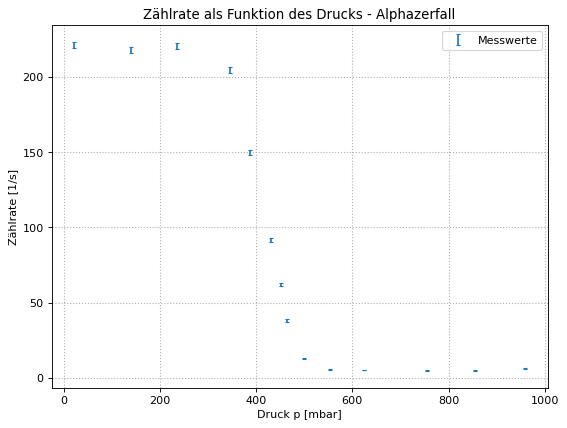

In [62]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(p_alpha,n_alpha, yerr = n_alpha_err, linestyle='None', label="Messwerte", capsize = 2)
plt.xlabel('Druck p [mbar]')
plt.ylabel('Zählrate [1/s]')
plt.title('Zählrate als Funktion des Drucks - Alphazerfall')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [63]:
p_12 = 415
p_12_err = 5

p0 = 1013 #mbar
s0 = 3.95 #cm
s0_err = 0.05 #cm

s1_alpha = p_12 * s0 / p0
s1_alpha_err = np.sqrt((p_12_err * s0 / p0)**2 + (p_12 * s0_err / p0)**2)
print("s1:", s1_alpha, "+-", s1_alpha_err)

s1: 1.618213228035538 +- 0.02827892697064406


In [64]:
rho_gl = 2.25 #mg/cm^2
rho_gl0 = 1.43 #mg/cm^2

s2_alpha = rho_gl / rho_gl0
print("s2:", s2_alpha)

s2: 1.5734265734265735


In [65]:
s3_alpha = 0.68 #cm
sges_alpha = s1_alpha + s2_alpha + s3_alpha
sges_alpha_err = s1_alpha_err

print("Gesamtreichweite:", sges_alpha, "+-", sges_alpha_err)

Gesamtreichweite: 3.8716398014621114 +- 0.02827892697064406


In [66]:
E_alpha = 5.4
E_alpha_err = 0.2

E_alpha_lit = 5.48 #MeV

sigma_E_alpha = (E_alpha_lit - E_alpha)/(E_alpha_err)
print("Abweichung:", sigma_E_alpha)

Abweichung: 0.40000000000000036
